In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Paths to your CSV data files
q1_data_path = './data/content/Jan-29-2024_Mar-31-2024.csv'
q2_data_path = './data/content/Apr-01-2024_Jun-30-2024.csv'
q3_data_path = './data/content/Jul-01-2024_Sep-30-2024.csv'

# Load the data
Q1 = pd.read_csv(q1_data_path)
Q2 = pd.read_csv(q2_data_path)
Q3 = pd.read_csv(q3_data_path)

# Add a 'Quarter' column to each DataFrame
Q1['Quarter'] = 0  # Q1: Jan to Mar
Q2['Quarter'] = 1  # Q2: Apr to Jun
Q3['Quarter'] = 2  # Q3: Jul to Sep

# Keep only relevant columns
columns_to_keep = ['Permalink','Publish time', 'Likes', 'Shares', 'Plays', 'Comments', 'Saves', 'Impressions', 'Reach', 'Quarter']
filtered_Q1 = Q1[columns_to_keep]
filtered_Q2 = Q2[columns_to_keep]
filtered_Q3 = Q3[columns_to_keep]

# Combine all quarters into one DataFrame
combined_df = pd.concat([filtered_Q1, filtered_Q2, filtered_Q3], ignore_index=True)

# Convert 'Publish time' to a datetime format
combined_df['Publish time'] = pd.to_datetime(combined_df['Publish time'], format='%m/%d/%Y %H:%M')

# Create new fields from 'Publish time'
combined_df['Year'] = combined_df['Publish time'].dt.year
combined_df['Month'] = combined_df['Publish time'].dt.month
combined_df['Day'] = combined_df['Publish time'].dt.day
combined_df['Day of Week'] = combined_df['Publish time'].dt.dayofweek  # 0=Monday, 6=Sunday
combined_df['Hour'] = combined_df['Publish time'].dt.hour

# Drop 'Publish time' if it's no longer needed, or keep it as reference
combined_df = combined_df.drop(columns=['Publish time'])

# Display the updated DataFrame with more detailed fields
print(combined_df.head())

# Export the DataFrame to a CSV file
combined_df.to_csv('./data/content/combined_data.csv', index=False)



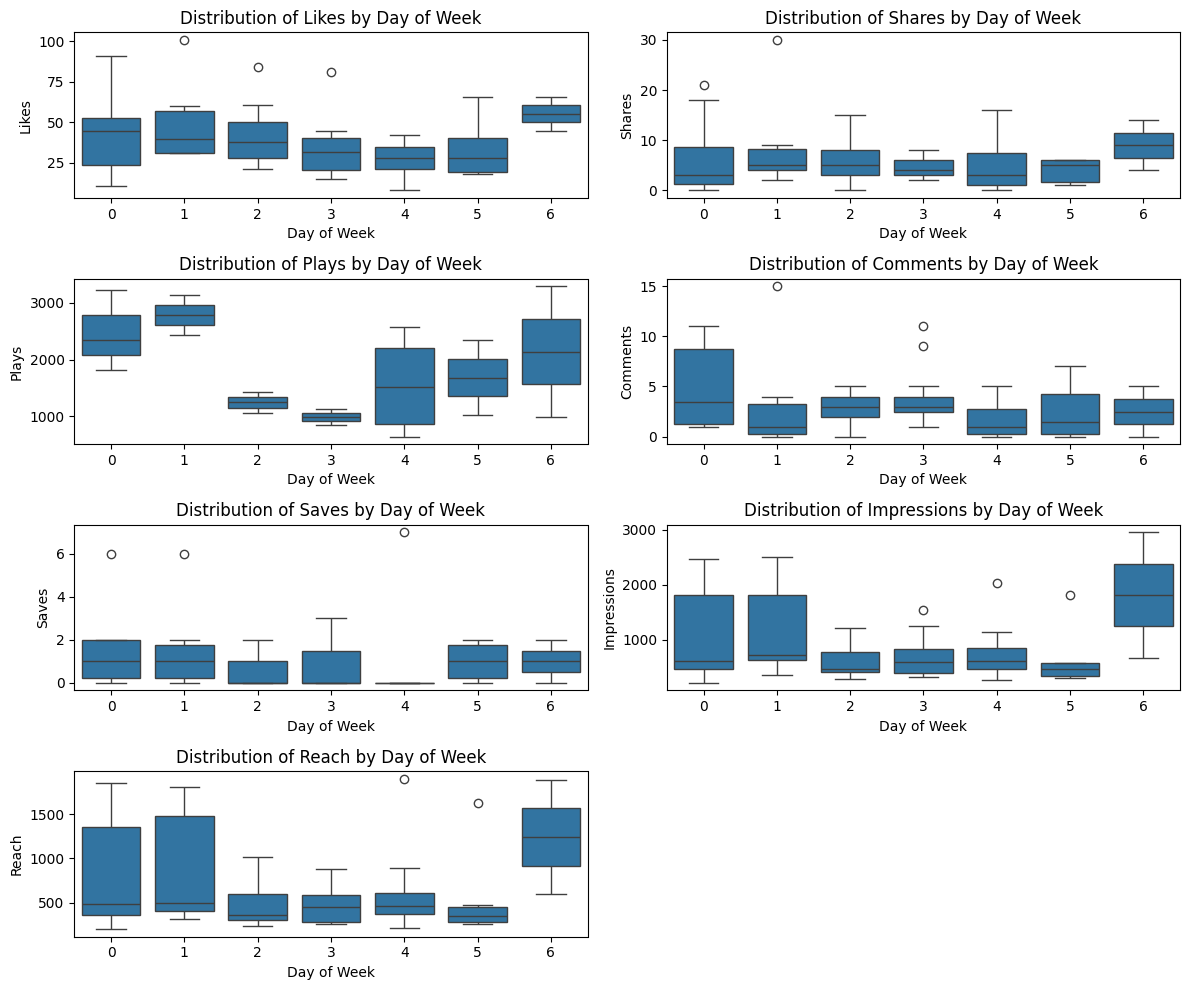

In [5]:
interaction_fields = ['Likes', 'Shares', 'Plays', 'Comments', 'Saves', 'Impressions', 'Reach']

# Set up the figure and axes for multiple plots
plt.figure(figsize=(12, 10))

# Loop through each interaction field and create a box plot
for i, field in enumerate(interaction_fields, 1):
    plt.subplot(4, 2, i)  # Create subplots in a 4x2 grid
    sns.boxplot(x='Day of Week', y=field, data=combined_df)
    plt.title(f'Distribution of {field} by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel(field)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

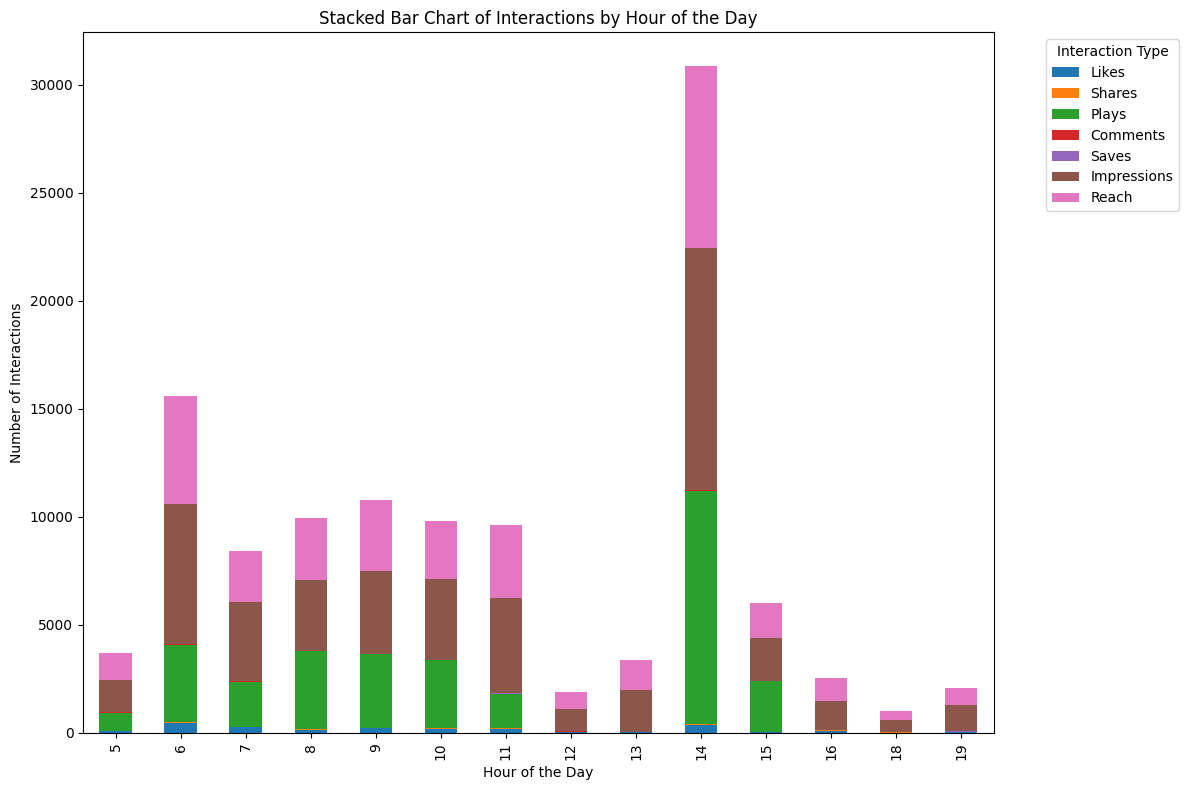

In [6]:
grouped_data = combined_df.groupby('Hour')[interaction_fields].sum()

# Create a stacked bar chart
plt.figure(figsize=(12, 8))

# Plot stacked bars for each interaction type
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add titles and labels
plt.title('Stacked Bar Chart of Interactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Interactions')
plt.legend(title='Interaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()